# Data Dictionary
## Here's a brief version of what you'll find in the data description file.

## Variable Description
### pc- Primary Camera mega pixels
### fc- Front Camera mega pixels
### sc_h - Screen Height of mobile in cm
### sc_w - Screen Width of mobile in cm
### m_dep - Mobile Depth in cm
### px_width - Pixel Resolution Width
### px_height - Pixel Resolution Height
### ram - Random Access Memory in Mega Bytes
### int_memory - Internal Memory in Giga Bytes
### four_g - Has 4G or not
### three_g - Has 3G or not
### dual_sim - Has dual sim support or not
### battery_power - Total energy a battery can store in one time measured in mAh
### touch_screen - Has touch screen or not
### clock_speed - speed at which microprocessor executes instructions
### n_cores - Number of cores of processor
### wifi - Has wifi or not
### blue - Has bluetooth or not
### mobile_wt - Weight of mobile phone
### talk_time - longest time that a single battery charge will last when you are
### price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Import the libraries




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.api.types import CategoricalDtype
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Model Import

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
import pickle

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

# Importing the dataset

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(2000, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
data.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


# Data Exploration, Pre-processing and Feature Engineering

The goal of EDA is the find out more about the data and become a subject matter expert.

What question are we trying to solve?
What kind of data do we have and how do we treat them eg: Catogorical data, Numerical Data
What's missing from the data and how should we deal with them.
Where are Outliers and Why should we remove them.
How can you Add,Change,Remove features to get more from your data?

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
price_order = CategoricalDtype(categories=['Budget', 'Mid Ranger', 'Premium', 'Flagship'], ordered=True)

data['price_bracket'] = data['price_range'].replace({
    0: 'Budget',
    1: 'Mid Ranger',
    2: 'Premium',
    3: 'Flagship'
})

data['price_bracket'] = data['price_bracket'].astype(price_order)

data.head(1).T

,0
battery_power,842
blue,0
clock_speed,2.2
dual_sim,0
fc,1
four_g,0
int_memory,7
m_dep,0.6
mobile_wt,188
n_cores,2


## Renaming the column names

In [8]:
data.rename(columns={
    'int_memory': 'Internal Memory',
    'battery_power': 'Battery Power',
    'dual_sim': 'Dual SIM',
    'ram': 'Ram',
    'four_g': '4G',
    'n_cores': 'Cores',
    'mobile_wt': 'Mobile Weight',
    'pc': 'Primary Camera',
    'px_height': 'Pixel Height',
    'px_width': 'Pixel Width',
    'talk_time': 'Talk Time',
    'three_g': '3G',
    'touch_screen': 'Touch Screen',
    'fc': 'Front Camera',
    'pc': 'Primary Camera',
    'clock_speed': 'Clock speed'
}, inplace=True)

### Pixel Density – Measures screen sharpness by calculating pixels per unit screen area.
### Weight-to-Screen Ratio – Indicates how bulky the phone is relative to its screen size.
### Talk Time per Battery Power – Estimates battery efficiency based on talk time per unit battery power.
### Compute Power – Approximates processing capability using clock speed and number of cores.

In [9]:
data["pixel_density"] = (data["Pixel Height"] * data["Pixel Width"]) / (data["sc_h"] * data["sc_w"])

# Weight-to-Screen Ratio: Higher means the phone is bulky
data["weight_screen_ratio"] = data["Mobile Weight"] / (data["sc_h"] * data["sc_w"])

# Talk Time per Battery Power: Measures efficiency of power usage
data["talk_battery_ratio"] = data["Talk Time"] / data["Battery Power"]

# Computes compute power
data["compute_power"] = (data["Clock speed"] * 1.5) + (data["Cores"] * 1.2)


In [10]:
data.rename(columns={
    'pixel_density': 'Pixel Density',
    'weight_screen_ratio': 'Weight Screen Ratio',
    'talk_battery_ratio': 'Talk Time Battery Ratio',
    'compute_power': 'Compute Power',
}, inplace=True)

# Exploratory Data Analysis

The goal of EDA is the find out more about the data and become a subject matter expert.

### From this analysis we can find that the dataset is evenly distributed and its not an imbalanced dataset.

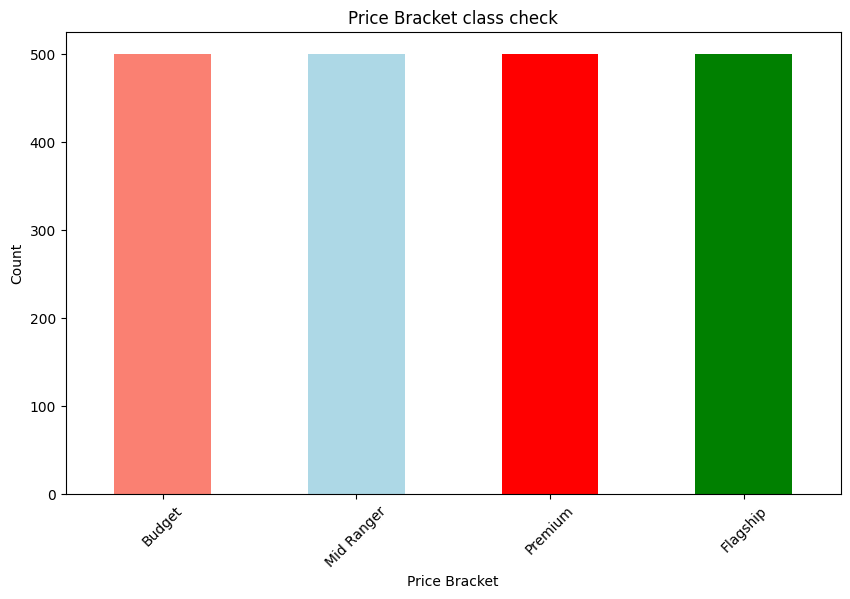

In [11]:
plt.figure(figsize=(10, 6))
data['price_bracket'].value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'red', 'green'])
plt.title("Price Bracket class check")
plt.xlabel("Price Bracket")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

We analyze the distribution of CPU cores in the dataset by identifying the different core counts and calculating the frequency of each. This helps us understand the prevalence of different processor configurations in the dataset.

<Axes: xlabel='Cores'>

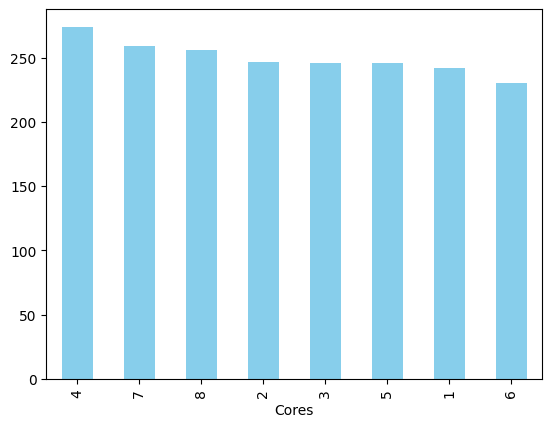

In [12]:
data['Cores'].value_counts().plot(kind='bar',color=['Skyblue'])

We examine the relationship between RAM and price range, observing that higher-priced phones generally have more RAM, indicating a positive correlation between RAM capacity and phone cost.

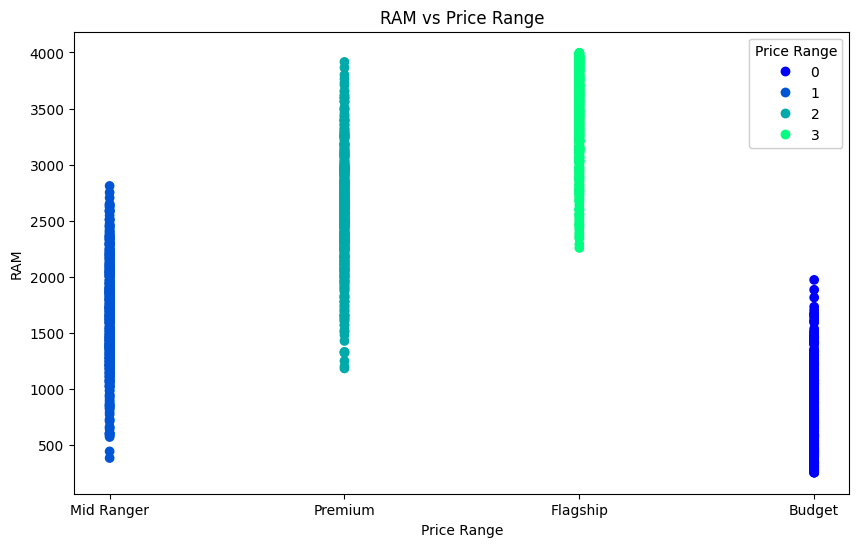

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(data["price_bracket"], data["Ram"], c=data["price_range"], cmap='winter')

ax.set(title="RAM vs Price Range", xlabel='Price Range', ylabel="RAM")

legend1 = ax.legend(*scatter.legend_elements(), title="Price Range")
ax.add_artist(legend1)

plt.show()

Our analysis suggests that internal memory has a weaker correlation with phone price. This is evident in the box plot, where the median internal memory values for Budget (32.1) and Flagship phones (31.2) are quite similar. Despite differences in price segments, internal memory capacity does not show a consistent increasing trend across price brackets. Thus, it may not be a major factor in predicting the price range of a phone.

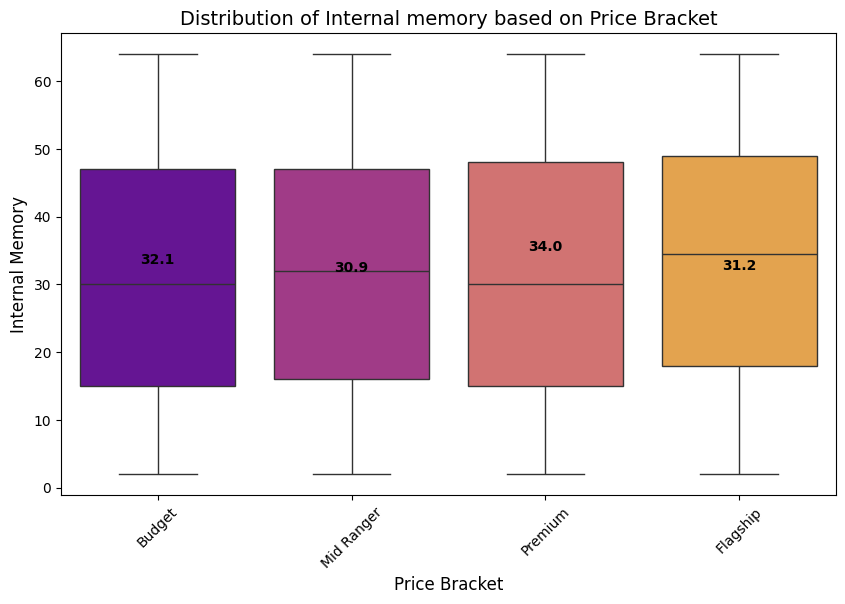

In [14]:
plt.figure(figsize=(10,6))

# Create boxplot with explicit hue assignment
sns.boxplot(x='price_bracket', y='Internal Memory', hue='price_bracket', data=data, palette='plasma', legend=False)

# Add numerical labels at the median positions for better interpretation
for i, bracket in enumerate(data['price_bracket'].unique()):
    avg_value = data[data['price_bracket'] == bracket]['Internal Memory'].mean()
    plt.text(i, avg_value + 1, f'{avg_value:.1f}',
             horizontalalignment='center', fontsize=10, color='black', fontweight='bold')

# Titles and labels
plt.title("Distribution of Internal memory based on Price Bracket", fontsize=14)
plt.xlabel("Price Bracket", fontsize=12)
plt.ylabel("Internal Memory", fontsize=12)
plt.xticks(rotation=45)

plt.show()

The pie chart indicates a positive correlation between battery power and price range, with flagship phones having the highest battery power share (27.9%) compared to budget phones (22.5%). This suggests that as the price bracket increases, phones generally have better battery capacity, likely due to advancements in power optimization and higher-capacity batteries in premium models.

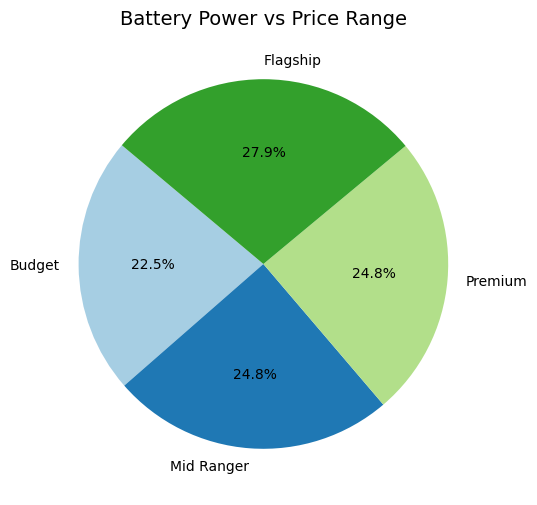

In [15]:
battery_power_by_price = data.groupby('price_bracket', observed=True)['Battery Power'].sum()

plt.figure(figsize=(15,6))
plt.pie(battery_power_by_price, labels=battery_power_by_price.index,
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
plt.title("Battery Power vs Price Range", fontsize=14)

plt.show()

From our analysis we find that Higher-priced phones generally have higher screen resolutions, with flagship models having the best pixel height and width. However, the trend is not strictly linear, as mid-range and premium phones show similar values, suggesting that other factors like display technology and aspect ratio also influence pricing.

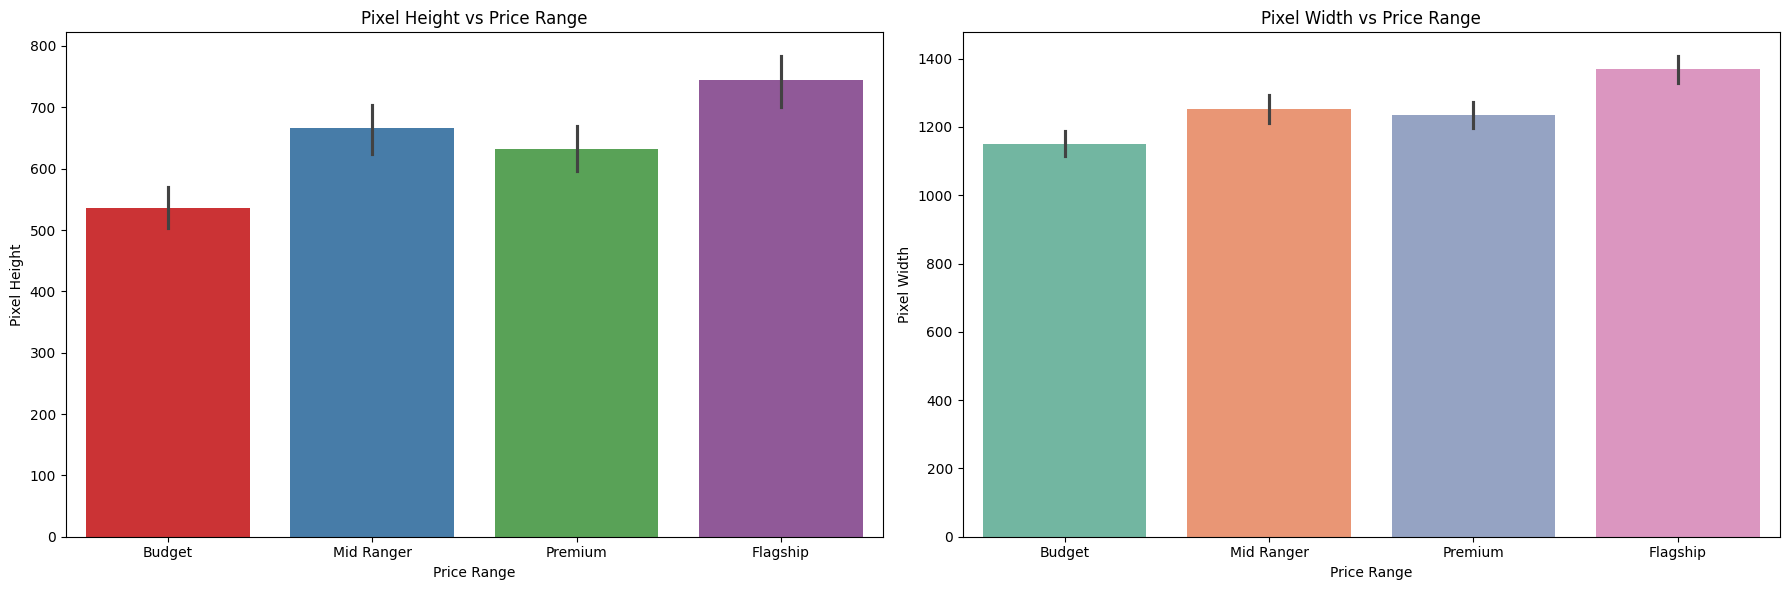

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.barplot(x='price_bracket', y='Pixel Height', data=data, hue='price_range', palette='Set1', legend=False)
plt.title("Pixel Height vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Pixel Height")

plt.subplot(1,2,2)
sns.barplot(x='price_bracket', y='Pixel Width', data=data, hue='price_range', palette='Set2', legend=False)
plt.title("Pixel Width vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Pixel Width")


plt.tight_layout()
plt.show()

The graph shows that budget and mid-range phones have a higher weight-to-screen ratio than premium and flagship models. This suggests that costlier phones tend to be lighter relative to their screen size, likely due to the use of premium materials and better weight distribution. However, the trend is not strictly linear, as mid-range phones have a higher ratio than both budget and premium phones.


<Figure size 1800x600 with 0 Axes>

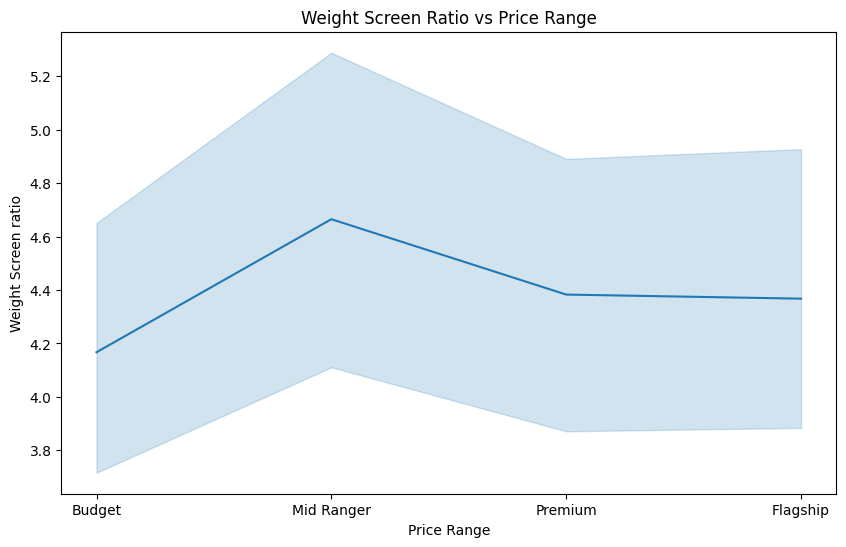

In [17]:
plt.figure(figsize=(18,6))

plt.figure(figsize=(10,6))
sns.lineplot(x='price_bracket',y='Weight Screen Ratio',data=data)
plt.title("Weight Screen Ratio vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Weight Screen ratio")
plt.show()

The box plot shows a positive correlation between the number of cores and compute power, with higher-core devices generally having greater processing capability, though variations exist due to factors like clock speed and chipset efficiency.

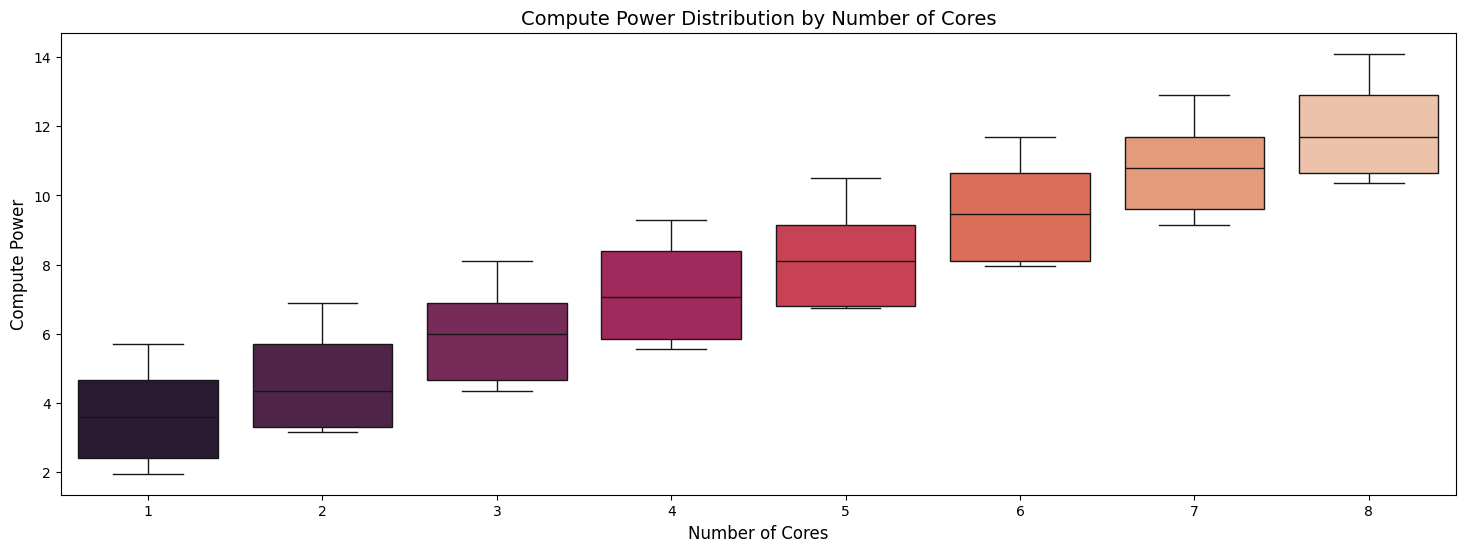

In [18]:
cores_col = "Cores"
compute_col = "Compute Power"

data[cores_col] = pd.to_numeric(data[cores_col], errors='coerce')
data[compute_col] = pd.to_numeric(data[compute_col], errors='coerce')

data[cores_col] = pd.Categorical(data[cores_col].astype(int), categories=sorted(data[cores_col].dropna().astype(int).unique()), ordered=True)

plt.figure(figsize=(18,6))

sns.boxplot(x=cores_col, y=compute_col, data=data, hue=cores_col, palette='rocket', legend=False)
plt.title("Compute Power Distribution by Number of Cores", fontsize=14)
plt.xlabel("Number of Cores", fontsize=12)
plt.ylabel("Compute Power", fontsize=12)

plt.show()

# Identifying missing values

In [19]:
# Check for NaN values
print("Missing Values:\n", data.isnull().sum())

# Check for infinite values
print("Infinite Values:\n", (data == np.inf).sum() + (data == -np.inf).sum())


Missing Values:
 Battery Power              0
blue                       0
Clock speed                0
Dual SIM                   0
Front Camera               0
4G                         0
Internal Memory            0
m_dep                      0
Mobile Weight              0
Cores                      0
Primary Camera             0
Pixel Height               0
Pixel Width                0
Ram                        0
sc_h                       0
sc_w                       0
Talk Time                  0
3G                         0
Touch Screen               0
wifi                       0
price_range                0
price_bracket              0
Pixel Density              1
Weight Screen Ratio        0
Talk Time Battery Ratio    0
Compute Power              0
dtype: int64
Infinite Values:
 Battery Power                0
blue                         0
Clock speed                  0
Dual SIM                     0
Front Camera                 0
4G                           0
Internal Mem

# Treating missing values

In [20]:
 # Correct column names
 pixel_density_col = "Pixel Density"
 weight_screen_ratio_col = "Weight Screen Ratio"
 # Replace infinite values with NaN
 data[pixel_density_col] = data[pixel_density_col].replace([np.inf, -np.inf], np.nan)
 data[weight_screen_ratio_col] = data[weight_screen_ratio_col].replace([np.inf, -np.inf], np.nan)
 # Impute missing values with median
 data[pixel_density_col] = data[pixel_density_col].fillna(data[pixel_density_col].median())
 data[weight_screen_ratio_col] = data[weight_screen_ratio_col].fillna(data[weight_screen_ratio_col].median())
 # Verify missing values are fixed
 print("Missing values after fix:\n", data.isnull().sum())

Missing values after fix:
 Battery Power              0
blue                       0
Clock speed                0
Dual SIM                   0
Front Camera               0
4G                         0
Internal Memory            0
m_dep                      0
Mobile Weight              0
Cores                      0
Primary Camera             0
Pixel Height               0
Pixel Width                0
Ram                        0
sc_h                       0
sc_w                       0
Talk Time                  0
3G                         0
Touch Screen               0
wifi                       0
price_range                0
price_bracket              0
Pixel Density              0
Weight Screen Ratio        0
Talk Time Battery Ratio    0
Compute Power              0
dtype: int64


# Dropping the unwanted columns which we dont want to use based on previous trials of building our model.

In [21]:
data.drop(columns=['blue','Talk Time','Mobile Weight', 'sc_h', 'sc_w','3G','m_dep','price_bracket','Mobile Weight','Cores','Pixel Height','Pixel Width'], inplace=True)

# Feature Selection

In [22]:
X = data.drop(columns=['price_range'])
y = data['price_range']

# Correlation Matrix using Heatmap

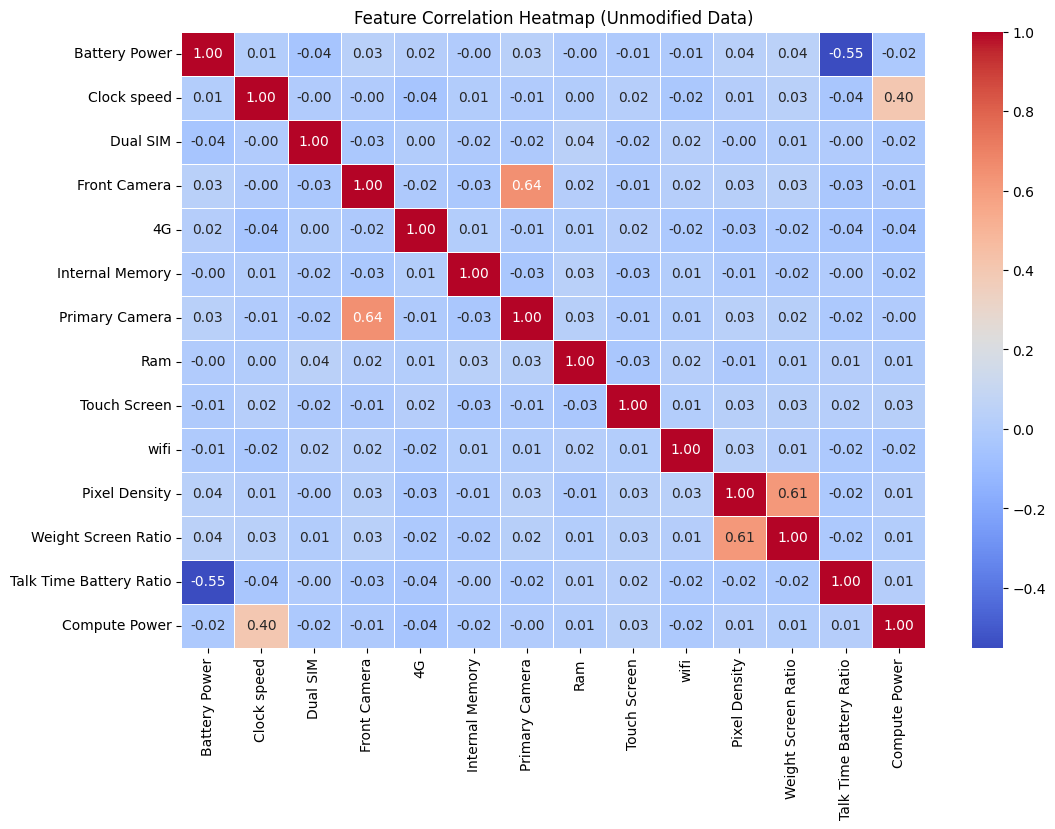

In [23]:
# Compute correlation matrix without modifying features based on VIF
corr_matrix = X.corr()

# Plot heatmap to visualize correlations separately from VIF calculations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Unmodified Data)")
plt.show()

## We use the Variance Inflation Factor (VIF) is used to identify and remove highly multicollinear features, as multicollinearity can introduce bias and instability in model predictions.

In [24]:
def remove_high_vif_features(X, threshold=10):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    while vif_data["VIF"].max() > threshold:
        max_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Removing {max_vif_feature} with VIF: {vif_data['VIF'].max():,.2f}")

        # Drop the feature with highest VIF
        X = X.drop(columns=[max_vif_feature])

        # Recalculate VIF after removal
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return X, vif_data  # ✅ Correct return statement

# ✅ Correct function call
X_new, vif_data_new = remove_high_vif_features(X)

# ✅ Display the VIF values after feature removal
print("\nVIF Values After Feature Removal:")
print(vif_data_new)



VIF Values After Feature Removal:
                    Feature       VIF
0             Battery Power  7.266164
1               Clock speed  5.261852
2                  Dual SIM  1.979443
3              Front Camera  3.408283
4                        4G  2.028425
5           Internal Memory  3.816518
6            Primary Camera  6.095250
7                       Ram  4.555917
8              Touch Screen  1.981967
9                      wifi  1.981386
10            Pixel Density  2.035247
11      Weight Screen Ratio  2.535655
12  Talk Time Battery Ratio  3.238624
13            Compute Power  8.231311


# Model Building

## Splitting the data and Feature scaling

In [25]:
np.random.seed(42)

# split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building baseline Machine Learning Model to assess how it performs without any hyperparameters

*  Logistic Regression
*  K Nearest Neighbors
*  Random Forest
*  Naive Bayes
*  Gradient Boosting
*  AdaBoost














In [27]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [28]:
def fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    fitted_models = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        fitted_models[name] = model
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        model_scores[name] = accuracy
        print(f"\nModel: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    return model_scores, fitted_models

# Baseline Model Performance evaluation

* Accuracy – Measures the overall correctness of the model. A high accuracy suggests that the model performs well, but it may not be reliable in case there are imbalanced datasets.

* Precision – Measures how many of the predicted positive cases were actually positive. A high precision indicates that the model makes fewer false positive errors.

* Recall – Measures how many actual positive cases were correctly predicted. A high recall suggests the model is good at identifying positive cases but may increase false positives.

* F1-score – The harmonic mean of precision and recall. This metric balances both precision and recall.

In [29]:
model_scores, fitted_models = fit_and_score(models=models,
                             X_train_scaled=X_train_scaled,
                             X_test_scaled=X_test_scaled,
                             y_train=y_train,
                             y_test=y_test)

model_scores, fitted_models


Model: Logistic Regression
Accuracy: 0.8167

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.76      0.80      0.78       146
           2       0.72      0.72      0.72       148
           3       0.87      0.83      0.85       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600


Model: KNN
Accuracy: 0.5400

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       151
           1       0.39      0.43      0.41       146
           2       0.40      0.39      0.39       148
           3       0.72      0.57      0.63       155

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.55      0.54      0.54       600


Model: 

({'Logistic Regression': 0.8166666666666667,
  'KNN': 0.54,
  'Random Forest': 0.825,
  'Naive Bayes': 0.7616666666666667,
  'Gradient Boosting': 0.84,
  'AdaBoost': 0.5566666666666666},
 {'Logistic Regression': LogisticRegression(),
  'KNN': KNeighborsClassifier(),
  'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=200),
  'Naive Bayes': GaussianNB(),
  'Gradient Boosting': GradientBoostingClassifier(),
  'AdaBoost': AdaBoostClassifier()})

In [30]:
def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name):
    """
    Evaluate model performance using train, test, and overall accuracy.
    """
    # Train and Test Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy Scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overall_accuracy = (train_accuracy + test_accuracy) / 2

    return pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Overall Accuracy': [overall_accuracy]
    })


# Collect results into a DataFrame
results = pd.DataFrame()
for name, model in fitted_models.items():
    results = pd.concat([results, evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )], ignore_index=True)

# Format and display results
results.set_index('Model', inplace=True)
results = results.round(4)

print("\nModel Comparison:")
display(results)



Model Comparison:


,Train Accuracy,Test Accuracy,Overall Accuracy
Model,,,
Logistic Regression,0.8700,0.8167,0.8433
KNN,0.7079,0.5400,0.6239
Random Forest,0.9950,0.8250,0.9100
Naive Bayes,0.7814,0.7617,0.7715
Gradient Boosting,0.9907,0.8400,0.9154
AdaBoost,0.5779,0.5567,0.5673


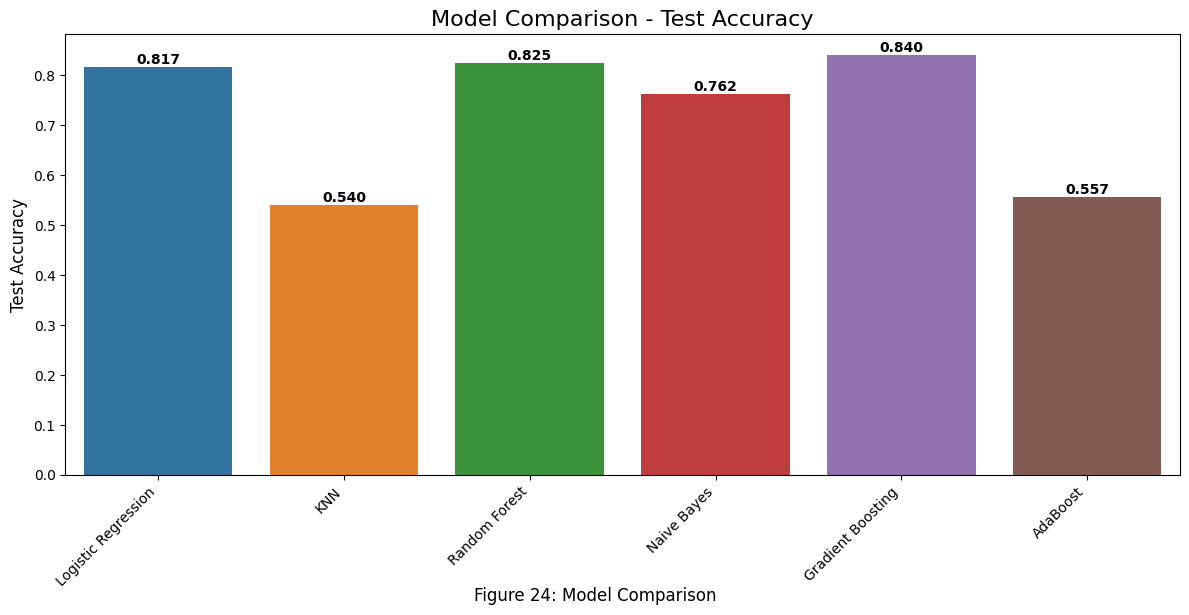

In [31]:
plt.figure(figsize=(12, 6))
plot_data = pd.DataFrame({
    'Model': results.index,
    'Test Accuracy': results['Test Accuracy']
})
ax = sns.barplot(x='Model', y='Test Accuracy', data=plot_data, hue='Model', dodge=False)
plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
ax.set_xlabel(None)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(plot_data['Test Accuracy']):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, -0.01, 'Figure 24: Model Comparison', ha='center', fontsize=12)
plt.show()

#Hyperparameter Tuning

In [32]:
tuned_models = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
        }
    },
    "KNN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski'],
            'p': [1, 2]
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 75, 100, 150],
            'max_depth': [5, 7, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 5, 10],
            'max_features': ['sqrt', 'log2']
        }
    },
    "Naive Bayes": {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(-9, 0, 10)
        }
    },
    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    "AdaBoost": {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'learning_rate': [0.01, 0.05, 0.1, 0.2]
        }
    },
}


In [33]:
def fit_and_score(tuned_models, X_train_scaled, X_test_scaled, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    fitted_models = {}

    for name, model_info in tuned_models.items():
        print(f"\nOptimizing {name}...")

        # Perform RandomizedSearchCV for hyperparameter tuning
        random_search = RandomizedSearchCV(
            model_info['model'],
            model_info['params'],
            n_iter=16,
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42
        )
        random_search.fit(X_train_scaled, y_train)
        best_model = random_search.best_estimator_

        # Save model and calculate accuracy
        fitted_models[name] = best_model
        y_pred = best_model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        model_scores[name] = accuracy

        # Print results
        print(f"\nModel: {name}")
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    return model_scores, fitted_models

# Hyperparameter Model performance evaluation

In [34]:
# Starting hyperparameter tuning
print("Starting hyperparameter tuning...")
model_scores, fitted_models = fit_and_score(tuned_models, X_train_scaled, X_test_scaled, y_train, y_test)

Starting hyperparameter tuning...

Optimizing Logistic Regression...

Model: Logistic Regression
Best parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 1}
Accuracy: 0.8300

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       151
           1       0.78      0.81      0.79       146
           2       0.74      0.74      0.74       148
           3       0.89      0.85      0.87       155

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600


Optimizing KNN...

Model: KNN
Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 15, 'metric': 'manhattan'}
Accuracy: 0.6450

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.54      0.58      0.55       146
           2       0.50      0.48      0

In [35]:
def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name):
    """
    Evaluate model performance using train, test, and overall accuracy.
    """
    # Train and Test Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy Scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overall_accuracy = (train_accuracy + test_accuracy) / 2

    return pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Overall Accuracy': [overall_accuracy]
    })


# Collect results into a DataFrame
results = pd.DataFrame()
for name, model in fitted_models.items():
    results = pd.concat([results, evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )], ignore_index=True)

# Format and display results
results.set_index('Model', inplace=True)
results = results.round(4)

print("\nModel Comparison:")
display(results)



Model Comparison:


,Train Accuracy,Test Accuracy,Overall Accuracy
Model,,,
Logistic Regression,0.8693,0.8300,0.8496
KNN,1.0000,0.6450,0.8225
Random Forest,0.9993,0.8117,0.9055
Naive Bayes,0.7814,0.7583,0.7699
Gradient Boosting,1.0000,0.8250,0.9125
AdaBoost,0.7571,0.7500,0.7536


### After extensive testing and hyperparameter tuning, Logistic Regression emerged as the best model for your dataset.

Here’s why:

* Logistic Regression achieved 83.0% test accuracy, making it one of the most reliable models.

* Other models suffered from overfitting, as seen in the high gap between training and test accuracy.

* Several models overfit to the training data, which is evident from large training-test accuracy gaps:

* KNN (1.0000 Train, 0.6450 Test) → Severe Overfitting.
* Random Forest (0.9564 Train, 0.8283 Test) → Overfitting.
*Gradient Boosting (1.0000 Train, 0.8317 Test) → Overfitting.

In contrast, Logistic Regression maintains a balanced accuracy across train and test sets, demonstrating better generalisation.

For this dataset, simpler models like Logistic Regression perform better because of limited data, while Random Forest tends to memorise training data instead of learning general patterns.

Reason Why logistic regression performed better:

* Smaller Dataset: With limited data, simpler models often perform better.
* Unlike Random Forest and Gradient Boosting, which are complex black-box models, logistic Regression provides:Feature Importance (via coefficients)and Probability scores (helpful for understanding model confidence) along with faster Training & Prediction time which makes it computationally lightweight compared to ensemble models.

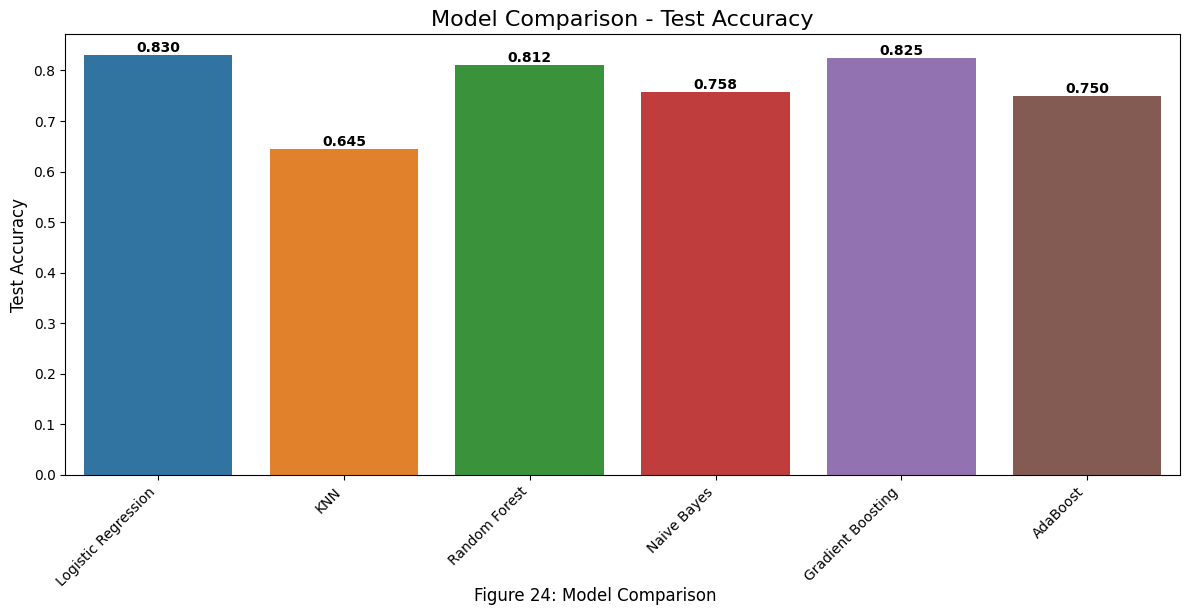

In [36]:
plt.figure(figsize=(12, 6))
plot_data = pd.DataFrame({
    'Model': results.index,
    'Test Accuracy': results['Test Accuracy']
})

# Create bar plot
ax = sns.barplot(x='Model', y='Test Accuracy', data=plot_data, hue='Model', dodge=False)
plt.title('Model Comparison - Test Accuracy', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
ax.set_xlabel(None)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(plot_data['Test Accuracy']):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure caption
plt.figtext(0.5, -0.01, 'Figure 24: Model Comparison', ha='center', fontsize=12)

plt.show()

In [ ]:
log_reg = fitted_models.get("Logistic Regression")

In [ ]:
# Get the best model (Logistic Regression based on the results)
best_model = fitted_models["Logistic Regression"]

## Plotting the confusion matrix to see how the model has performed on predictions on TP, TN, FP and FN.

* Confusion Matrix – A summary of the model’s predictions versus actual values.

The four components are:

* True Positives (TP) – Correctly predicted positive cases.
* False Positives (FP) – Incorrectly predicted positive cases. (Type 1 Error)
* True Negatives (TN) – Correctly predicted negative cases.
* False Negatives (FN) – Incorrectly predicted negative cases. (Type 2 Error)


The model has correctly predicted 139 as Low cost, 118 as medium cost  109 as high and 132 as very high

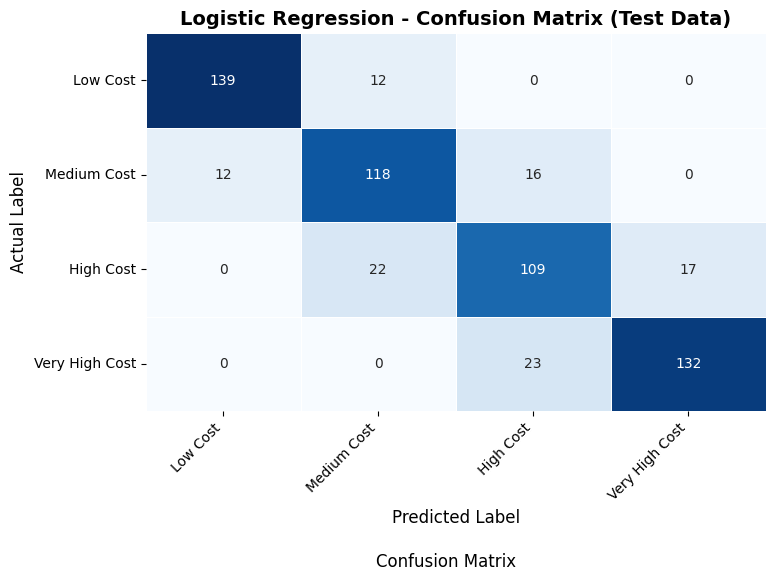

In [161]:
def plot_confusion_matrix(model, X_test_scaled, y_test, model_name="Logistic Regression"):
    """
    Generate and display the confusion matrix for a trained model.
    """
    # Get model predictions
    y_pred = model.predict(X_test_scaled)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Define class labels (assumed 4 price categories: 0, 1, 2, 3)
    class_labels = ["Low Cost", "Medium Cost", "High Cost", "Very High Cost"]

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

    # Add Labels
    ax.set_title(f'{model_name} - Confusion Matrix (Test Data)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('Actual Label', fontsize=12)

    # Set Proper Tick Labels
    ax.set_xticklabels(class_labels, rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(class_labels, rotation=0, fontsize=10)

    # Adjust layout
    plt.subplots_adjust(bottom=0.25)
    plt.figtext(0.5, -0.01, 'Confusion Matrix', ha='center', fontsize=12)

    plt.show()

# Call the function with the best model
plot_confusion_matrix(best_model, X_test_scaled, y_test, "Logistic Regression")

## Saving the model and scalar

In [162]:
with open('Gradient_decent.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

print("Trained model saved successfully!")

Trained model saved successfully!


In [163]:
with open('StandardScaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("StandardScaler Saved!")

StandardScaler Saved!


## Displaying the Feature importance of the trained Logistic Regression Model

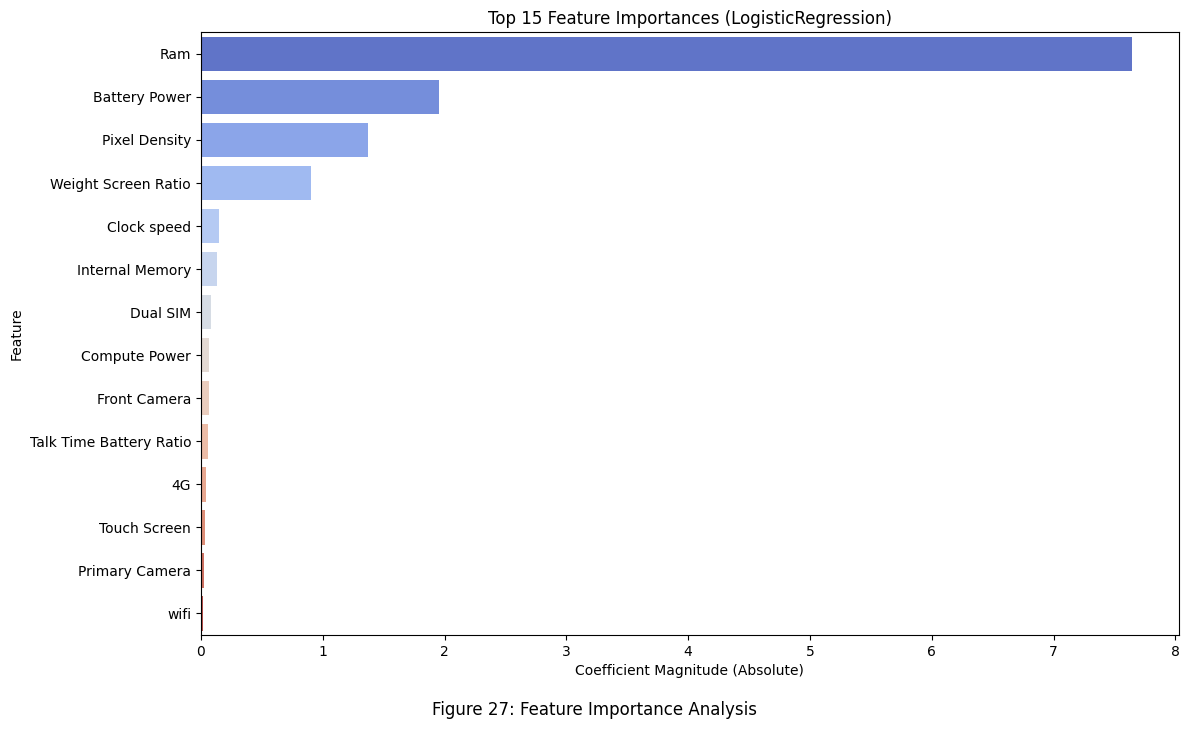


Top 15 Most Important Features:
                    Feature  Importance
7                       Ram    7.646054
0             Battery Power    1.952259
10            Pixel Density    1.374314
11      Weight Screen Ratio    0.902436
1               Clock speed    0.149078
5           Internal Memory    0.133046
2                  Dual SIM    0.086226
13            Compute Power    0.070327
3              Front Camera    0.070013
12  Talk Time Battery Ratio    0.056990
4                        4G    0.043716
8              Touch Screen    0.035333
6            Primary Camera    0.028597
9                      wifi    0.019570


In [164]:
def get_feature_importance(model, feature_names):
    """
    Extract feature importance from Logistic Regression.
    Uses absolute coefficient values as importance scores.
    """
    if hasattr(model, 'coef_'):
        # If the model is multiclass, average absolute coefficients
        if model.coef_.ndim == 1:
            importance_values = np.abs(model.coef_)
        else:
            importance_values = np.mean(np.abs(model.coef_), axis=0)

        return pd.DataFrame({'Feature': feature_names, 'Importance': importance_values}).sort_values(by='Importance', ascending=False)
    else:
        print(f"{model.__class__.__name__} doesn't support feature importance extraction.")
        return None

# Extract feature importance
original_feature_names = X_train.columns.tolist()  # Ensure feature names match dataset
feature_importance = get_feature_importance(best_model, original_feature_names)

# Plot if available
if feature_importance is not None:
    plt.figure(figsize=(12, 8))

    # Fix: Explicitly set `hue="Feature"` and `legend=False`
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), hue="Feature", legend=False, palette="coolwarm")

    plt.title(f'Top 15 Feature Importances ({best_model.__class__.__name__})')
    plt.xlabel("Coefficient Magnitude (Absolute)")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    plt.figtext(0.5, 0.1, 'Figure 27: Feature Importance Analysis', ha='center', fontsize=12)
    plt.show()

    print("\nTop 15 Most Important Features:")
    print(feature_importance.head(15))
else:
    print("\nFeature importance not available for this model type.")


From our feature importance analysis we find that RAM as the most significant predictor of mobile price range. Battery power, pixel density, and weight screen ratio also contribute substantially to price classification. Clock speed, internal memory, and dual SIM have moderate influence, while 4G, touch screen, and compute power play a minor role. The model effectively leverages these key features for accurate predictions.

# Disclaimer:

Compute power is a key factor in determining a phone's price, but in this model, it has lower importance. This could be because the way compute power is calculated (clock speed * cores) doesn’t fully capture actual CPU performance, as modern processors have other optimizations like cache size, architecture, and efficiency cores. It’s also possible that compute power is highly correlated with RAM and battery power, so the model relies more on those features. Another reason could be dataset limitations—the CPU-related data in this dataset might not be detailed enough to reflect real-world pricing variations. So, while compute power is definitely important, its lower impact in this model should be taken with caution.

## Use for feature importance for tree based and ensemble models.

In [165]:
# def get_feature_importance(model, feature_names):
#     """
#     Extract feature importance from models. For Logistic Regression,
#     uses the absolute value of coefficients; for tree-based models,
#     utilises the feature_importances_ attribute.
#     """
#     if hasattr(model, 'coef_'):
#         # If the model is multiclass, average absolute coefficients
#         if model.coef_.ndim == 1:
#             importance_values = np.abs(model.coef_)
#         else:
#             importance_values = np.mean(np.abs(model.coef_), axis=0)
#     elif hasattr(model, 'feature_importances_'):
#         importance_values = model.feature_importances_
#     else:
#         print(f"{model.__class__.__name__} doesn't support feature importance extraction.")
#         return None

#     return pd.DataFrame({'Feature': feature_names, 'Importance': importance_values}).sort_values(by='Importance', ascending=False)

# # Extract feature importance
# original_feature_names = X_train.columns.tolist()  # Ensure feature names match dataset
# feature_importance = get_feature_importance(best_model, original_feature_names)

# # Plot if available
# if feature_importance is not None:
#     plt.figure(figsize=(12, 8))
#     sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15),
#                 hue="Feature", dodge=False, legend=False, palette="coolwarm")
#     plt.title(f'Top 15 Feature Importances ({best_model.__class__.__name__})')
#     plt.xlabel("Importance Score")
#     plt.ylabel("Feature")
#     plt.tight_layout()
#     plt.subplots_adjust(bottom=0.2)
#     plt.figtext(0.5, 0.1, 'Figure 27: Feature Importance Analysis', ha='center', fontsize=12)
#     plt.show()

#     print("\nTop 15 Most Important Features:")
#     print(feature_importance.head(15))
# else:
#     print("\nFeature importance not available for this model type.")

## Importing the test data for evaluating the predictions

In [179]:
test = pd.read_csv('test.csv')

## Performing Data-preprocessing and Feature engineering as done for the training set

In [167]:
test.drop(columns=['id','blue','m_dep','three_g'],axis=1,inplace=True)

In [168]:
test.rename(columns={
    'int_memory': 'Internal Memory',
    'battery_power': 'Battery Power',
    'dual_sim': 'Dual SIM',
    'ram': 'Ram',
    'four_g': '4G',
    'n_cores': 'Cores',
    'mobile_wt': 'Mobile Weight',
    'px_height': 'Pixel Height',
    'px_width': 'Pixel Width',
    'talk_time': 'Talk Time',
    'touch_screen': 'Touch Screen',
    'clock_speed': 'Clock speed',
    'pc': 'Primary Camera',
    'fc': 'Front Camera',
    'sc_h': 'sc_h',
    'sc_w': 'sc_w'
}, inplace=True)

In [169]:
test["Pixel Density"] = (test["Pixel Height"] * test["Pixel Width"]) / (test["sc_h"] * test["sc_w"]).replace(0, np.nan)
test["Weight Screen Ratio"] = test["Mobile Weight"] / test.eval("sc_h * sc_w").replace(0, np.nan)
test["Talk Time Battery Ratio"] = test["Talk Time"] / test["Battery Power"]
test["Compute Power"] = (test["Clock speed"] * 1.5) + (test["Cores"] * 1.2)

# Fill any NaN values from calculations (handling missing `sc_h`, `sc_w`)
test.fillna(0, inplace=True)

expected_features = [
    "Battery Power", "Clock speed", "Dual SIM", "Front Camera", "4G",
    "Internal Memory", "Primary Camera", "Ram", "Touch Screen", "wifi",
    "Pixel Density", "Weight Screen Ratio", "Talk Time Battery Ratio", "Compute Power"
]
test = test[expected_features]

### Dropping the unwanted columns as done in train.csv

In [170]:
test.drop(columns=['blue', 'talk_time', 'mobile_wt', 'sc_h', 'sc_w', 'three_g', 'm_dep','n_cores','id','Pixel Height','Pixel Width'], inplace=True, errors='ignore')

## Impute missing values using median due to it being prone to outliers

In [172]:
for col in expected_features:
    if col not in test.columns:
        print(f"Missing in test, filling default: {col}")
        test[col] = data[col].median()  # Fill missing columns with median from train

test = test[expected_features]

## Scaling our test data using the scalar.pkl

In [173]:
test_scaled = scaler.transform(test)

test_scaled_df = pd.DataFrame(test_scaled, columns=expected_features)

## Running our model prediction and assessing it using the prediction.csv

In [180]:
y_pred = best_model.predict(test_scaled_df)

test["Predicted Price Range"] = y_pred

#test[['Ram', 'Clock speed', 'Battery Power', 'Predicted Price Range']].head()

In [176]:
# Save predictions
test.to_csv("test_predictions.csv", index=False)

print("Predictions saved successfully!")

Predictions saved successfully!


# Drawing Conclusion

# Smartphone companies can use this model to predict which price segment their new phones would fall into based on specs. This helps in pricing strategy and market positioning

